In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import datetime as dtm
pylab.rcParams['figure.figsize'] = (14, 9)

In [2]:
data_case=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
data_case

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/30/21,8/31/21,9/1/21,9/2/21,9/3/21,9/4/21,9/5/21,9/6/21,9/7/21,9/8/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,153148,153220,153260,153306,153375,153375,153375,153534,153626,153736
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,145333,146387,147369,148222,149117,150101,150997,151499,152239,153318
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,195574,196080,196527,196915,197308,197659,198004,198313,198645,198962
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,15032,15033,15046,15052,15055,15055,15055,15069,15070,15070
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,47331,47544,47781,48004,48261,48475,48656,48790,49114,49349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,449489,462096,473530,486727,501649,511170,524307,536788,550996,563676
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,339816,342282,344957,347730,350224,351809,353732,356474,359236,361881
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7829,7869,7900,7951,8018,8056,8108,8142,8181,8230
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,206145,206327,206522,206705,206884,207028,207114,207167,207294,207442


In [7]:
case_id=data_case[data_case['Country/Region']=='Indonesia'].drop(columns=['Province/State','Country/Region','Lat','Long']).transpose()
case_id

,148
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
9/4/21,4123617
9/5/21,4129020
9/6/21,4133433
9/7/21,4140634


In [8]:
case_id=case_id.diff().fillna(0)
case_id

,148
1/22/20,0.0
1/23/20,0.0
1/24/20,0.0
1/25/20,0.0
1/26/20,0.0
...,...
9/4/21,6727.0
9/5/21,5403.0
9/6/21,4413.0
9/7/21,7201.0


In [79]:
len('12')

2

In [81]:
'20'+'20'

'2020'

In [10]:
dates=[]
for dt in case_id.index:
    if len(dt.split('/')[0])==1:
        m='0{}'.format(dt.split('/')[0])
    else:
        m=dt.split('/')[0]

    if len(dt.split('/')[1])==1:
        d='0{}'.format(dt.split('/')[1])
    else:
        d=dt.split('/')[1]
    dates.append(dtm.datetime.strptime('{}/{}/20{}'.format(m,d,dt.split('/')[2]), '%m/%d/%Y'))
case_id.index=dates

In [ ]:
dates=[]
for dt in case_id.index:
    date_list=dt.split('/')
    
    if len(date_list[0])==1:
        m='0'+date_list[0]
    else:
        m=date_list[0]
        
    if len(date_list[1])==1:
        d='0'+date_list[1]
    else:
        d=date_list[1]
    
    y='20'+date_list[2]
    
    dates.append(dtm.datetime.strptime(m+'/'+d+'/'+y,'%m/%d/%Y'))
case_id.index=dates

In [84]:
case_id.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-08-30', '2021-08-31', '2021-09-01', '2021-09-02',
               '2021-09-03', '2021-09-04', '2021-09-05', '2021-09-06',
               '2021-09-07', '2021-09-08'],
              dtype='datetime64[ns]', length=596, freq=None)

In [21]:
case_id.columns=['kasus']
case_id

,kasus
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-09-04,6727.0
2021-09-05,5403.0
2021-09-06,4413.0
2021-09-07,7201.0


<AxesSubplot:>

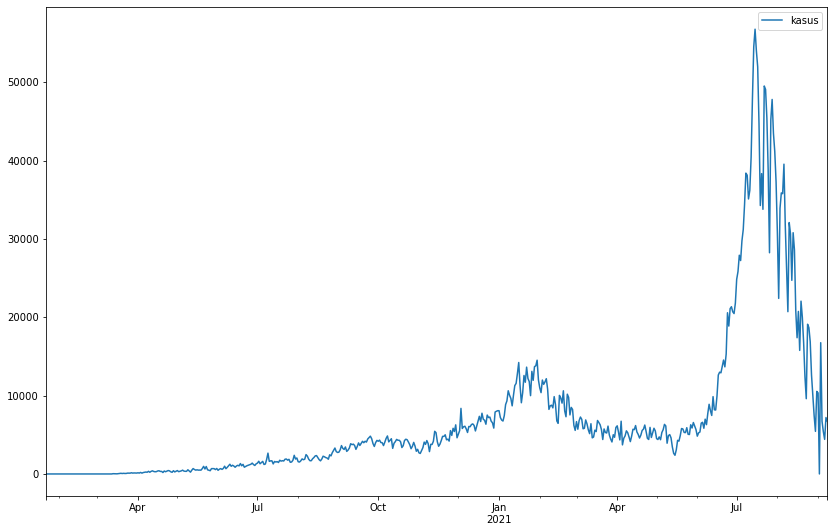

In [22]:
case_id.plot(kind='line')

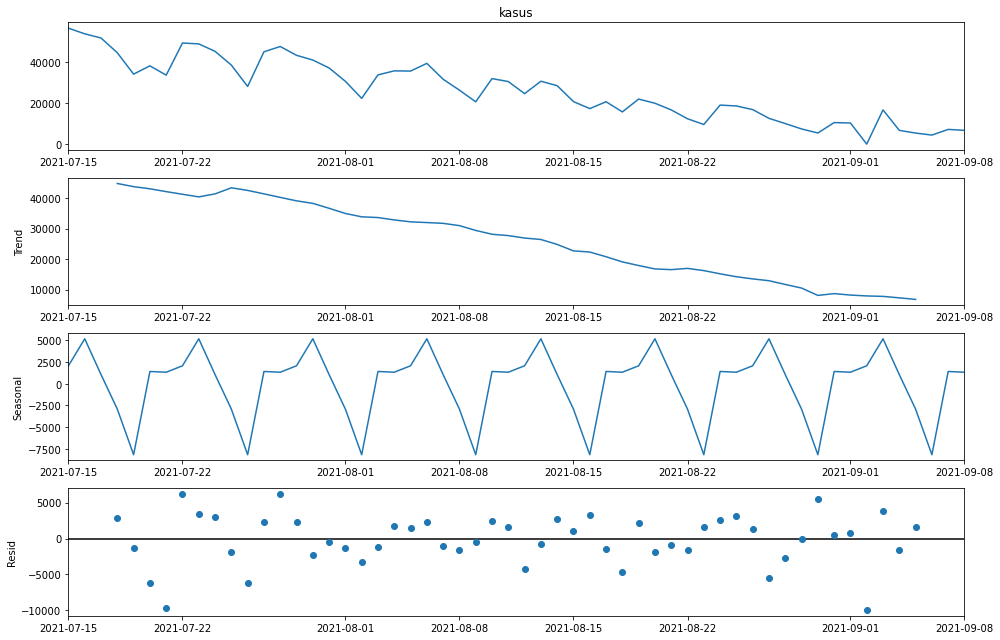

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(case_id['kasus'].loc['2021-07-15':], model='additive')
decomposed.plot();

<AxesSubplot:>

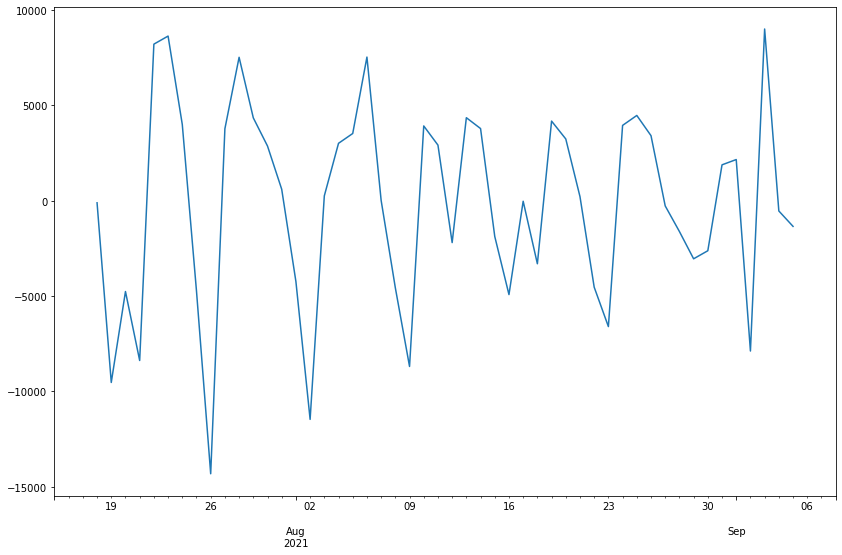

In [93]:
detrend=case_id['kasus'].loc['2021-07-15':]-decomposed.trend
detrend.plot(kind='line')

<AxesSubplot:>

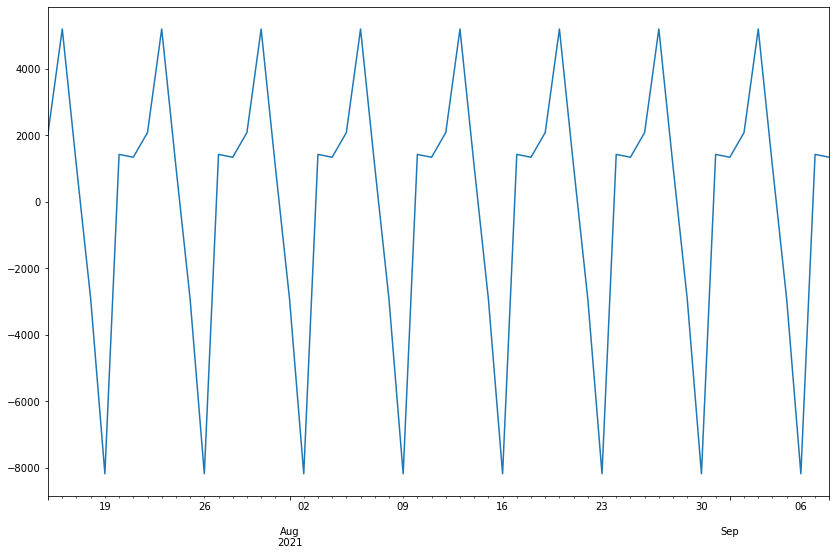

In [94]:
decomposed.seasonal.plot(kind='line')

<ipython-input-104-96b00d0454d1>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  case_id.groupby(case_id.index.week).mean().plot(kind='line')


<AxesSubplot:>

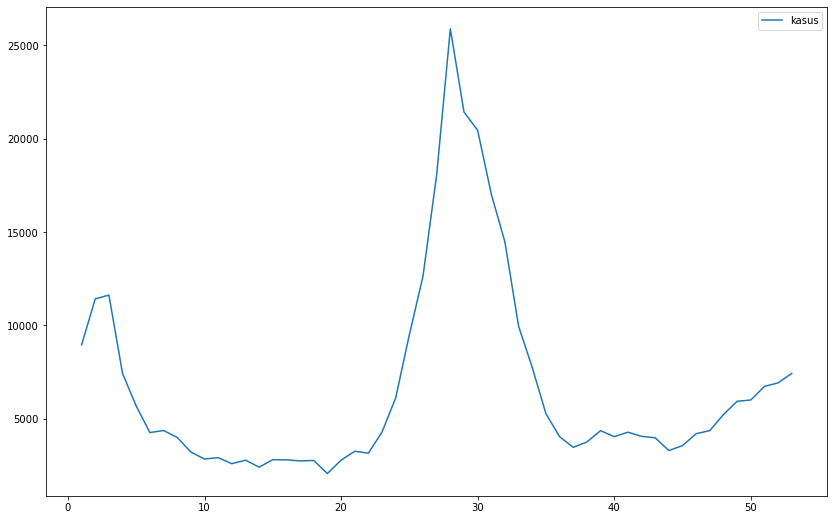

In [104]:
case_id.groupby(case_id.index.week).mean().plot(kind='line')

# Forecasting Using ARMA

In [113]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(case_id, order=(4,3))
res=mod.fit()

print('The AIC is',res.aic)

The AIC is 10751.937059332226


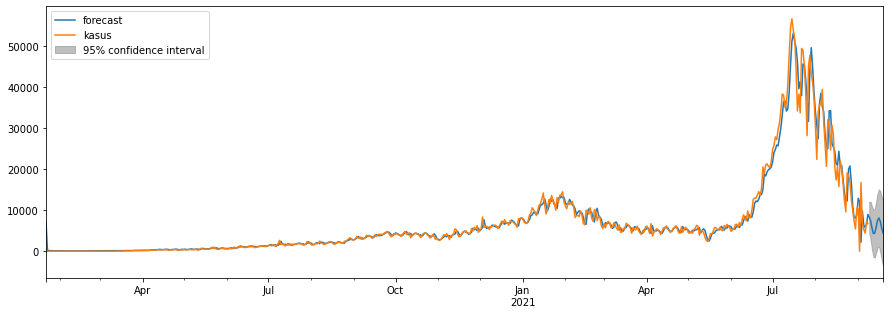

In [114]:
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(case_id)+10,ax=ax);

In [119]:
warnings.filterwarnings('ignore')

tunning=pd.DataFrame()

par=[[],[],[]]
for p in range(7):
    for q in range(7):
        model=ARMA(case_id,order=(p,q)).fit()
        par[0].append(p)
        par[1].append(q)
        par[2].append(model.aic)

tunning['p']=par[0]
tunning['q']=par[1]
tunning['aic']=par[2]

In [121]:
tunning.sort_values('aic',inplace=True)

The AIC is 10699.167070869886


(18871.0, 18900.0)

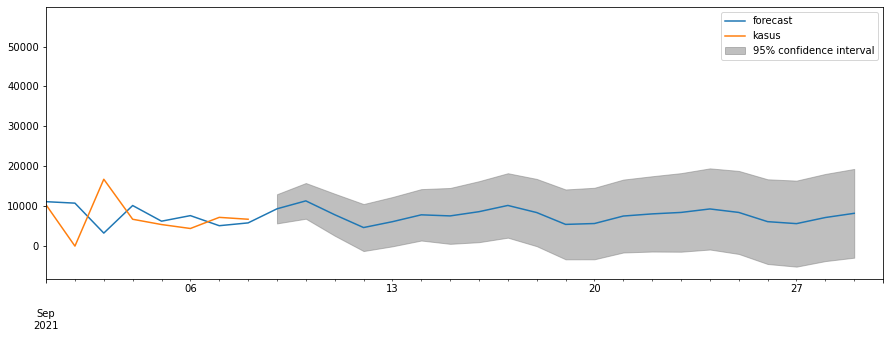

In [170]:
mod = ARMA(case_id, order=(tunning['p'].iloc[0],tunning['q'].iloc[1]))
res=mod.fit()

print('The AIC is',res.aic)
fig,ax=plt.subplots(figsize=(15,5))
res.plot_predict(start=0, end=len(case_id)+20,ax=ax);
ax.set_xlim('2021-09-01','2021-09-30')

# Forecasting Using Regression Models

In [130]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np

## Data Preprocessing
- Feature engineering
- Scaling
- Split data

### Feature Engineering

In [133]:
window=7
X=[]
y=[]
for i in range(window,len(case_id)):
    X.append(case_id.kasus.iloc[i-window:i].values)
    y.append(case_id.kasus.iloc[i])
X=np.array(X)
y=np.array(y)

In [134]:
X

array([[    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       [    0.,     0.,     0., ...,     0.,     0.,     0.],
       ...,
       [ 5436., 10534., 10337., ..., 16752.,  6727.,  5403.],
       [10534., 10337.,     0., ...,  6727.,  5403.,  4413.],
       [10337.,     0., 16752., ...,  5403.,  4413.,  7201.]])

In [135]:
y

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
       1.3000e+01, 8.0000e+00, 7.0000e+00, 0.0000e+00, 3.5000e+01,
       2.7000e+01, 2.1000e+01, 1.7000e+01, 3.8000e+01, 5.5000e+01,
       8.4000e+01, 5.8000e+01, 8.1000e+01, 6.4000e+01, 6.5000e+01,
       1.0700e+02, 1.0400e+02, 1.0300e+02, 1.5300e+02, 1.0900e+02,
       1.3000e+02, 1.2900e+02, 1.1400e+02, 1.4900e+02, 1.1300e+02,
       1.9600e+02, 1.0600e+02, 1.8100e+02, 2.1800e+02, 2.4700e+02,
       2.1800e+02, 3.3700e+02, 2.1900e+02, 3.3000e+02, 3.9900e

In [136]:
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)

train_size=0.8
train_idx=int(train_size*len(X_scaled))

X_train=X_scaled[:train_idx]
X_test=X_scaled[train_idx:]

y_train=y[:train_idx]
y_test=y[train_idx:]

<AxesSubplot:>

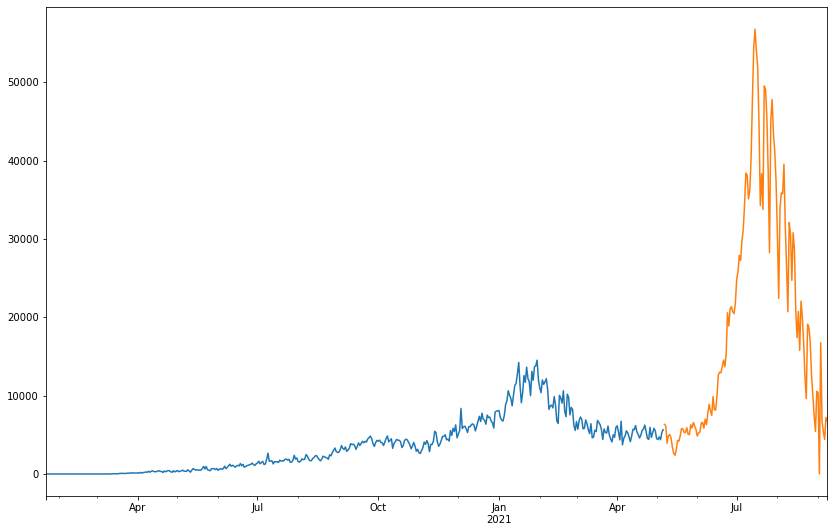

In [139]:
case_id.kasus.iloc[:train_idx].plot(kind='line')
case_id.kasus.iloc[train_idx:].plot(kind='line')

In [141]:
ts_split=TimeSeriesSplit(test_size=50,n_splits=2)

#for train_idx, test_idx in ts_split.split(X_scaled):
#    print(train_idx)
#    print(test_idx)

### SVR

In [143]:
model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)

17100.235529632817


<AxesSubplot:>

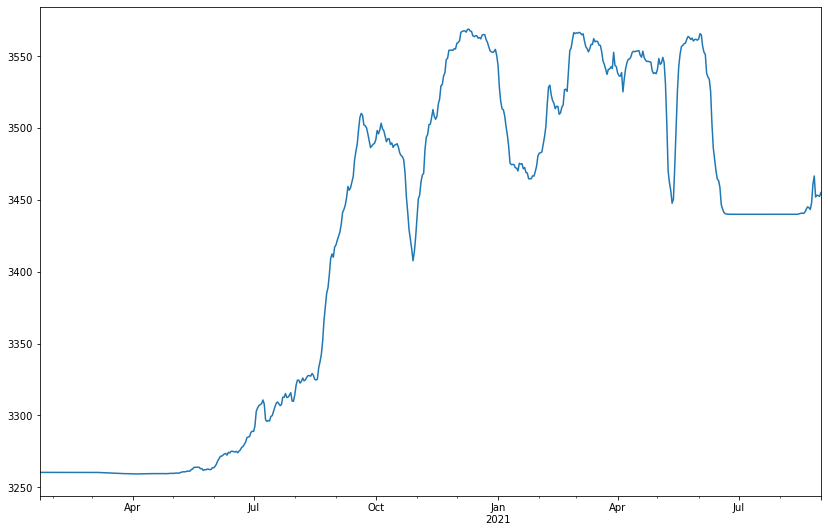

In [150]:
prediction=model.predict(X_scaled)
dat_forecast=pd.Series(prediction,index=case_id.iloc[:len(case_id)-window].index)

dat_forecast.plot(kind='line')
#case_id.kasus.plot(kind='line')

3396.6208150016164


<AxesSubplot:>

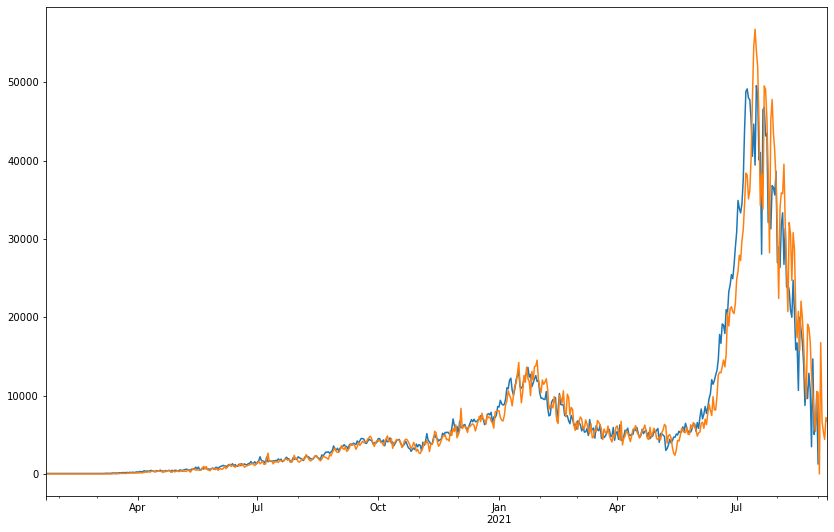

In [152]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
MAE=mean_absolute_error(y_test,y_pred)
print(MAE)

prediction=model.predict(X_scaled)
dat_forecast=pd.Series(prediction,index=case_id.iloc[:len(case_id)-window].index)

dat_forecast.plot(kind='line')
case_id.kasus.plot(kind='line')

In [161]:
case_id

,kasus
2020-01-22,0.0
2020-01-23,0.0
2020-01-24,0.0
2020-01-25,0.0
2020-01-26,0.0
...,...
2021-09-04,6727.0
2021-09-05,5403.0
2021-09-06,4413.0
2021-09-07,7201.0


In [164]:
forecasting

2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
               ...  
2021-11-03    7715.0
2021-11-04    7711.0
2021-11-05    7705.0
2021-11-06    7700.0
2021-11-07    7694.0
Name: kasus, Length: 656, dtype: float64

(18871.0, 18900.0)

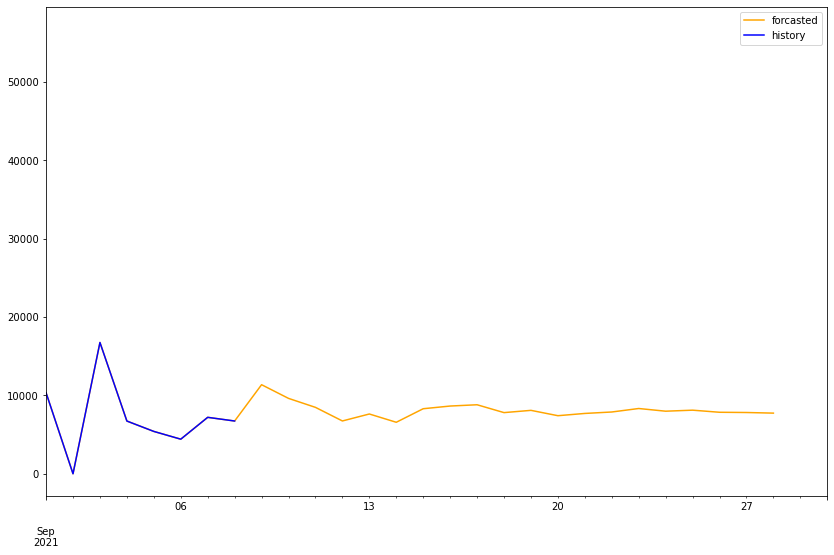

In [168]:
forecasting=case_id.kasus
days=20
for i in range(days):
    hist=scaler.transform(forecasting[-window:].values.reshape(1, -1)) #single data
    y_for=model.predict(hist)[0]
    new_date=forecasting.index[-1]+dtm.timedelta(days=1)
    forecasting.loc[new_date]=int(y_for)

fig,ax=plt.subplots()
forecasting.plot(kind='line',ax=ax,label='forcasted', color='orange')
case_id.kasus.plot(kind='line',ax=ax,label='history',color='blue')
ax.legend()
ax.set_xlim('2021-09-01','2021-09-30')

In [174]:
case_id['kasus'].loc['2021-09-08']

6731.0

In [172]:
forecasting['2021-09-09']

11365.0

In [158]:
model.predict(hist)[0]

7694.913688075837